In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
plt.style.use('seaborn')
from sklearn.datasets import load_wine
wine = load_wine()
cols = list(wine.feature_names)
cols.append('target')
df = pd.DataFrame(data=np.c_[wine.data, wine.target], columns=cols)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
x, y = df.drop('target', axis=1), df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

在主成分分析和因子分析中，方差解释率表示提取的主成分/因子对原有变量的解释能力，方差解释率越大，解释能力越强，越能体现原始变量的关键影响因素，提取的主成分或因子越有效。在回归中，决定系数也可以称为方差解释率，他代表了总方差被预测变量所解释或决定的比率，决定系数越逼近1，拟合效果和解释效果越好。

所谓方差越大，包含的信息也就越多，变量的解释能力也就越强。而各个主成分的方差等于其所对应的特征值，也就是Var(Yj)=λj，


----
特征值方法

注意，svd和ed用的都是中心化的数据

In [7]:
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
eigen_val

array([4.83408409, 2.46565883, 1.60795044, 0.99735841, 0.80634984,
       0.60102626, 0.48429853, 0.09303987, 0.34077896, 0.30016873,
       0.15734651, 0.20096595, 0.21666465])

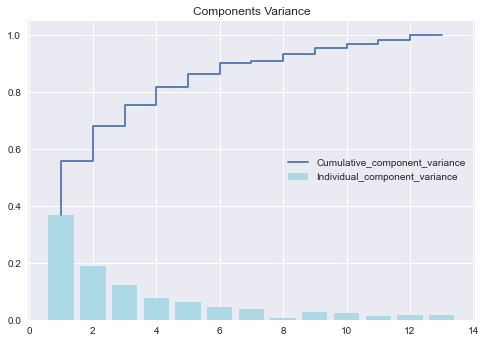

In [8]:
var_ratio = eigen_val/(eigen_val.sum())
cum_var_ratio = np.cumsum(var_ratio)
plt.step(x = range(1,14), y = cum_var_ratio,
        label = 'Cumulative_component_variance')
plt.bar(x = range(1,14), height = var_ratio, color = 'lightblue', 
        label = 'Individual_component_variance')
plt.title('Components Variance')
plt.legend(loc = 'right')


----
奇异值方法。

顺便检验两种方法算出的特征值是否相同。

In [9]:
U, S, V = np.linalg.svd(x_train_std)

In [32]:
x_train_std.shape

(124, 13)

In [11]:
eigen_val

array([4.83408409, 2.46565883, 1.60795044, 0.99735841, 0.80634984,
       0.60102626, 0.48429853, 0.09303987, 0.34077896, 0.30016873,
       0.15734651, 0.20096595, 0.21666465])

In [12]:
np.square(S) / (x_train_std.shape[0]-1)

array([4.83408409, 2.46565883, 1.60795044, 0.99735841, 0.80634984,
       0.60102626, 0.48429853, 0.34077896, 0.30016873, 0.21666465,
       0.20096595, 0.15734651, 0.09303987])

In [13]:
eigen_val1 = np.square(S) / (x_train_std.shape[0]-1)
var_ratio = eigen_val1/eigen_val1.sum()
cum_var_ratio = np.cumsum(var_ratio)

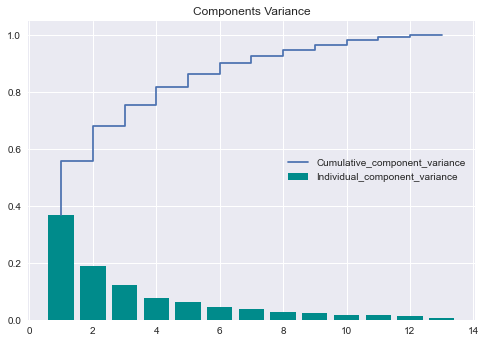

In [14]:

plt.step(x = range(1,14), 
        y = cum_var_ratio,
        label = 'Cumulative_component_variance')

plt.bar(x = range(1,14), 
        height = var_ratio, 
        color = 'darkcyan', 
        label = 'Individual_component_variance')

plt.title('Components Variance')
plt.legend(loc = 'right')


----
特征变换


In [15]:
eigen_pairs = [(np.abs(eigen_val[i]), 
                eigen_vec[:,i]) for i in range(len(eigen_val))]

eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [16]:
w = np.c_[eigen_pairs[0][1],eigen_pairs[1][1]]
w

array([[ 0.11645962,  0.4730375 ],
       [-0.25171097,  0.17752112],
       [-0.00422795,  0.30888974],
       [-0.22793778, -0.0313588 ],
       [ 0.08476121,  0.38317845],
       [ 0.39647836,  0.0656858 ],
       [ 0.41904379,  0.02051815],
       [-0.30696668,  0.01689802],
       [ 0.30869158,  0.04460681],
       [-0.13823206,  0.50697125],
       [ 0.32043958, -0.20440076],
       [ 0.38396378, -0.17197371],
       [ 0.26905601,  0.40757135]])

In [17]:
x_train_std.shape

(124, 13)

In [18]:
x_train_pca = x_train_std.dot(w)

Text(0.5, 1.0, 'PCA Result')

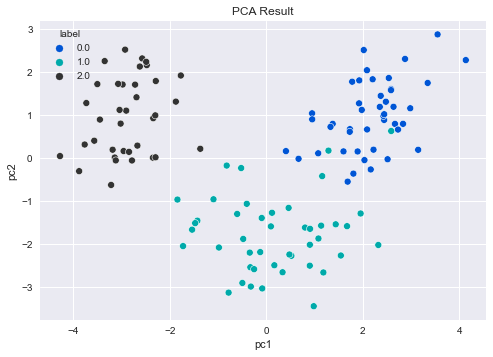

In [19]:
plot_df = pd.DataFrame({'pc1':x_train_pca[:,0],
                        'pc2':x_train_pca[:,1],
                        'label':y_train})
sns.scatterplot(x='pc1', y='pc2',
                data=plot_df,
                hue='label',
                palette='winter_d')
plt.title('PCA Result')

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [21]:
def plot_decision_regions(x, y, model , res=0.02):
    markers = ['s','x','o','^','v']
    colors = ['r','g','b','gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
    
    x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res),
                            np.arange(x2_min, x2_max,res))
    z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap = cmap)
    
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cc, 0],
                    y=x[y==cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label=cc)

In [22]:
for i in enumerate(np.unique(y_train)):
    print(i)

(0, 0.0)
(1, 1.0)
(2, 2.0)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


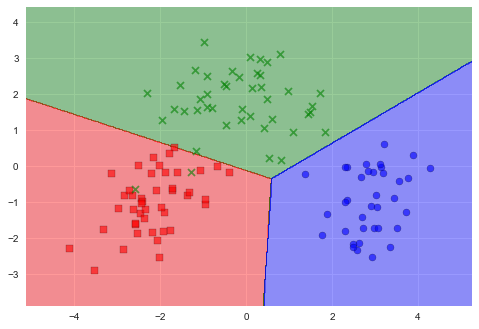

In [23]:
pca = PCA(n_components=2)
lr = LogisticRegression()
x_train_pca = pca.fit_transform(x_train_std)
x_test_pcs = pca.transform(x_test_std)

lr.fit(x_train_pca, y_train.astype('int'))
plot_decision_regions(x_train_pca, y_train.astype('int'), model=lr)


In [24]:
x = x_train_pca
y = y_train.astype('int')

In [25]:
x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                            np.arange(x2_min, x2_max, 0.02))

In [26]:
xx1

array([[-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823],
       [-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823],
       [-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823],
       ...,
       [-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823],
       [-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823],
       [-5.13682177, -5.11682177, -5.09682177, ...,  5.22317823,
         5.24317823,  5.26317823]])

In [27]:
xx2

array([[-3.87100234, -3.87100234, -3.87100234, ..., -3.87100234,
        -3.87100234, -3.87100234],
       [-3.85100234, -3.85100234, -3.85100234, ..., -3.85100234,
        -3.85100234, -3.85100234],
       [-3.83100234, -3.83100234, -3.83100234, ..., -3.83100234,
        -3.83100234, -3.83100234],
       ...,
       [ 4.38899766,  4.38899766,  4.38899766, ...,  4.38899766,
         4.38899766,  4.38899766],
       [ 4.40899766,  4.40899766,  4.40899766, ...,  4.40899766,
         4.40899766,  4.40899766],
       [ 4.42899766,  4.42899766,  4.42899766, ...,  4.42899766,
         4.42899766,  4.42899766]])

In [28]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.02),
                            np.arange(0, 2, 0.02))

In [29]:
xx1

array([[0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98],
       [0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98],
       [0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98],
       ...,
       [0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98],
       [0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98],
       [0.  , 0.02, 0.04, ..., 0.94, 0.96, 0.98]])

In [30]:
xx2

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [1.94, 1.94, 1.94, ..., 1.94, 1.94, 1.94],
       [1.96, 1.96, 1.96, ..., 1.96, 1.96, 1.96],
       [1.98, 1.98, 1.98, ..., 1.98, 1.98, 1.98]])